# --------------------------------------------Titanic EDA---------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
pip install ydata-profiling


                                              0.0/356.3 kB ? eta -:--:--
     ------------------------------------  348.2/356.3 kB 21.1 MB/s eta 0:00:01
     -------------------------------------- 356.3/356.3 kB 4.4 MB/s eta 0:00:00
                                              0.0/2.1 MB ? eta -:--:--
     -----------                              0.6/2.1 MB 12.9 MB/s eta 0:00:01
     ---------------                          0.8/2.1 MB 7.2 MB/s eta 0:00:01
     ------------------                       1.0/2.1 MB 6.8 MB/s eta 0:00:01
     ------------------                       1.0/2.1 MB 6.2 MB/s eta 0:00:01
     -------------------------                1.3/2.1 MB 5.6 MB/s eta 0:00:01
     -----------------------------            1.5/2.1 MB 5.4 MB/s eta 0:00:01
     --------------------------------         1.7/2.1 MB 5.2 MB/s eta 0:00:01
     -----------------------------------      1.9/2.1 MB 4.9 MB/s eta 0:00:01
     --------------------------------------   2.0/2.1 MB 4.8 MB/s eta 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [2]:
from ydata_profiling import ProfileReport

C:\Users\hp\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\hp\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [3]:
titanic_train=pd.read_csv("https://raw.githubusercontent.com/ANKITWARATHE/Titanic-Project/main/titanic_train.csv")
titanic_test=pd.read_csv("https://raw.githubusercontent.com/ANKITWARATHE/Titanic-Project/main/test.csv")

combine = [titanic_train, titanic_test]

In [4]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [5]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Top 5 record of titanic train data
titanic_train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [8]:
titanic_train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

# Examining Data

In [9]:
titanic_train.shape #shows total number of rows and columns in data set

(891, 12)

In [10]:
titanic_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Insights:

1.Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224)

2.Survived is a categorical feature with 0 or 1 values

3.Around 38% samples survived representative of the actual survival rate at 32%

4.Fares varied significantly with few passengers (<1%) paying as high as $512.

5.Few elderly passengers (<1%) within age range 65-80.

# Data Profiling
By pandas profiling, an interactive HTML report gets generated which contains all the information about the columns of the dataset, like the counts and type of each column.

1.Detailed information about each column, coorelation between different columns and a sample of dataset

2.It gives us visual interpretation of each column in the data

3.Spread of the data can be better understood by the distribution plot

4.Grannular level analysis of each column.

In [11]:
titanic_profile = ProfileReport(titanic_train, title= "Pandas Profiling Report")

In [12]:
titanic_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
titanic_profile.to_file(output_file="Pandas Profiling Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preprocessing
- Check for Errors and Null Values

- Replace Null Values with appropriate values

- Drop down features that are incomplete and are not too relevant for analysis

- Create new features that can would help to improve prediction

In [14]:
miss1=titanic_train.isnull().sum()
miss= (titanic_train.isnull().sum()/len(titanic_train))*100
miss_data=pd.concat([miss1,miss],axis=1,keys=['Total','%'])
print(miss_data)

             Total          %
PassengerId      0   0.000000
Survived         0   0.000000
Pclass           0   0.000000
Name             0   0.000000
Sex              0   0.000000
Age            177  19.865320
SibSp            0   0.000000
Parch            0   0.000000
Ticket           0   0.000000
Fare             0   0.000000
Cabin          687  77.104377
Embarked         2   0.224467


The Age, Cabin and Embarked have null values.Lets fix them

**Filling missing age by median**

In [15]:
new_age = titanic_train.Age.median()

In [16]:
new_age

28.0

In [17]:
titanic_train.Age.fillna(new_age, inplace = True)

**Filling missing Embarked by mode**

In [18]:
titanic_train.Embarked = titanic_train.Embarked.fillna(titanic_train['Embarked'].mode()[0])

In [19]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Cabin feature may be dropped as it is highly incomplete or contains many null values**

In [20]:
titanic_train.drop('Cabin', axis = 1,inplace = True)

In [21]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**PassengerId Feature may be dropped from training dataset as it does not contribute to survival**

In [22]:
titanic_train.drop('PassengerId', axis = 1,inplace = True)

**Ticket feature may be dropped down**

In [23]:
titanic_train.drop('Ticket', axis = 1,inplace = True)

## Creating New Fields

1.Create New Age Bands to improve prediction Insights

2.Create a new feature called Family based on Parch and SibSp to get total count of family members on board

3.Create a Fare range feature if it helps our analysis

# AGE-BAND

In [24]:
titanic_train['Age_band']=0

titanic_train.loc[titanic_train['Age']<=1,'Age_band']="Infant"

titanic_train.loc[(titanic_train['Age']>1)&(titanic_train['Age']<=12),'Age_band']="Children"

titanic_train.loc[titanic_train['Age']>12,'Age_band']="Adults"

titanic_train.head(10)

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   
5         0       3                                   Moran, Mr. James   
6         0       1                            McCarthy, Mr. Timothy J   
7         0       3                     Palsson, Master. Gosta Leonard   
8         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  SibSp  Parch     Fare Embarked  Age_band  
0    male  22.0      1      0   7.2500        S    Adults  
1  female  38.0      1      0  71.2833        C    Adults  
2  female  26.0      0      0   7.9250        S    Adults  
3  female  35.0      1      0  53.1000        S    Adults  
4    male  35.0      0      0   8.0500        S    Adults  
5    male  28.0      0      0   8.4583        Q    Adults  
6    male  54.0      0      0  51.8625        S    Adults  
7    male   2.0      3      1  21.0750        S  Children  
8  female  27.0      0      2  11.1333        S    Adults  
9  female  14.0      1      0  30.0708        C    Adults

# Fare-Band

In [25]:
titanic_train['FareBand']=0
titanic_train.loc[(titanic_train['Fare']>=0)&(titanic_train['Fare']<=10),'FareBand']=1
titanic_train.loc[(titanic_train['Fare']>10)&(titanic_train['Fare']<=15),'FareBand']=2
titanic_train.loc[(titanic_train['Fare']>15)&(titanic_train['Fare']<=35),'FareBand']=3
titanic_train.loc[titanic_train['Fare']>35,'FareBand']=4
titanic_train.head(10)

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   
5         0       3                                   Moran, Mr. James   
6         0       1                            McCarthy, Mr. Timothy J   
7         0       3                     Palsson, Master. Gosta Leonard   
8         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  SibSp  Parch     Fare Embarked  Age_band  FareBand  
0    male  22.0      1      0   7.2500        S    Adults         1  
1  female  38.0      1      0  71.2833        C    Adults         4  
2  female  26.0      0      0   7.9250        S    Adults         1  
3  female  35.0      1      0  53.1000        S    Adults         4  
4    male  35.0      0      0   8.0500        S    Adults         1  
5    male  28.0      0      0   8.4583        Q    Adults         1  
6    male  54.0      0      0  51.8625        S    Adults         4  
7    male   2.0      3      1  21.0750        S  Children         3  
8  female  27.0      0      2  11.1333        S    Adults         2  
9  female  14.0      1      0  30.0708        C    Adults         3

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

- In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

In [26]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic_train['Title'], titanic_train['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

We can replace many titles with a more common name or classify them as Rare.

In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

We can convert the categorical titles to ordinal.

In [28]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

titanic_train.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked Age_band  FareBand  Title  
0    male  22.0      1      0   7.2500        S   Adults         1      1  
1  female  38.0      1      0  71.2833        C   Adults         4      3  
2  female  26.0      0      0   7.9250        S   Adults         1      2  
3  female  35.0      1      0  53.1000        S   Adults         4      3  
4    male  35.0      0      0   8.0500        S   Adults         1      1

## Insights

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

**Decision**

We decide to retain the new Title feature for model training

### Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.
Converting Sex feature to a new feature called Gender where female=1 and male=0.

In [29]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

titanic_train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Embarked Age_band  FareBand  Title  
0  22.0      1      0   7.2500        S   Adults         1      1  
1  38.0      1      0  71.2833        C   Adults         4      3  
2  26.0      0      0   7.9250        S   Adults         1      2  
3  35.0      1      0  53.1000        S   Adults         4      3  
4  35.0      0      0   8.0500        S   Adults         1      1

**Extracting Titles Now we can drop down Name feature**

In [30]:
titanic_train.drop('Name', axis = 1,inplace = True)

In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

titanic_train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked Age_band  \
0         0       3    0  22.0      1      0   7.2500         0   Adults   
1         1       1    1  38.0      1      0  71.2833         1   Adults   
2         1       3    1  26.0      0      0   7.9250         0   Adults   
3         1       1    1  35.0      1      0  53.1000         0   Adults   
4         0       3    0  35.0      0      0   8.0500         0   Adults   

   FareBand  Title  
0         1      1  
1         4      3  
2         1      2  
3         4      3  
4         1      1

We can also create an artificial feature combining Pclass and Age.

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

titanic_train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

Age*Class   Age  Pclass
0       66.0  22.0       3
1       38.0  38.0       1
2       78.0  26.0       3
3       35.0  35.0       1
4      105.0  35.0       3
5       84.0  28.0       3
6       54.0  54.0       1
7        6.0   2.0       3
8       81.0  27.0       3
9       28.0  14.0       2

# Post Pandas Profiling : Checking Data after data preparation

In [34]:
profile = ProfileReport(titanic_train)
profile.to_file(output_file="Titanic_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualization

### 4.1 What is Total Count of Survivals and Victims?

In [33]:
titanic_train.groupby(['Survived'])['Survived'].count()# similar functions unique(),sum(),mean() etc

Survived
0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

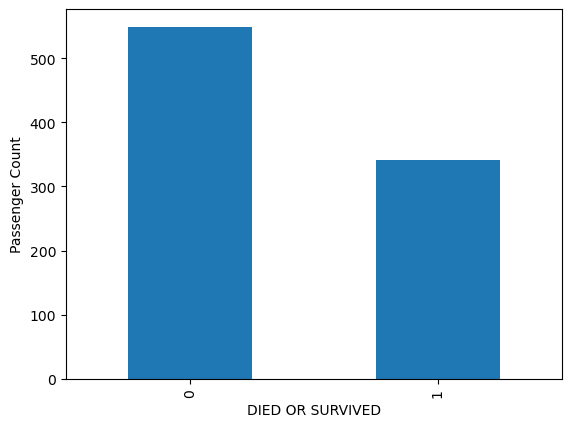

In [34]:
plt = titanic_train.Survived.value_counts().plot(kind ='bar')
plt.set_xlabel('DIED OR SURVIVED')
plt.set_ylabel('Passenger Count')

## Insights

- Only 342 Passengers Survived out of 891
- Majority Died which conveys there were less chances of Survival

### 4.2 Which gender has more survival rate?

In [35]:
titanic_train.groupby(['Survived', 'Sex']).count()["Age"]

Survived  Sex
0         0      468
          1       81
1         0      109
          1      233
Name: Age, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

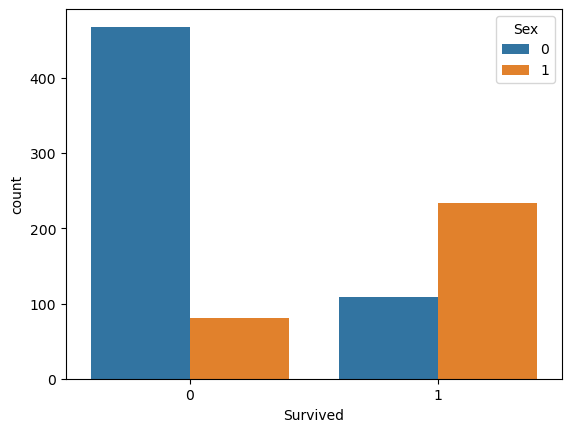

In [36]:
sns.countplot(data=titanic_train,x ='Survived',hue='Sex')

<Axes: xlabel='Sex'>

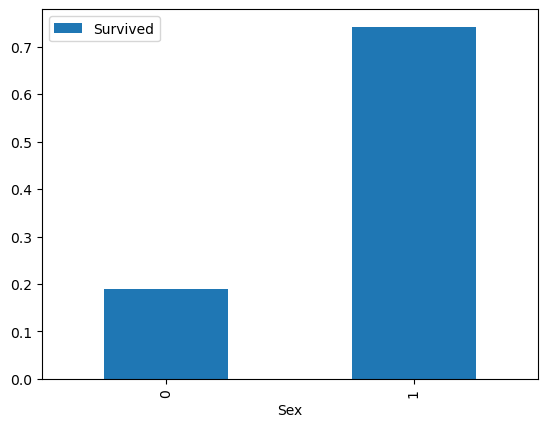

In [37]:
titanic_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

### Insights

- Female has better chances of Survival "LADIES FIRST"
- There were more males as compared to females ,but most of them died.

### 4.3 What is Survival rate based on Person type?

In [38]:
titanic_train.groupby(['Survived', 'Age_band']).count()['Sex']

Survived  Age_band
0         Adults      520
          Children     27
          Infant        2
1         Adults      302
          Children     28
          Infant       12
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Adult survival rate')

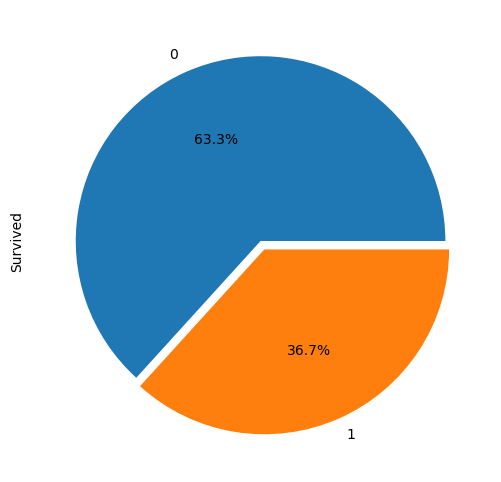

In [39]:
titanic_train[titanic_train['Age_band'] == 'Adults'].Survived.groupby(titanic_train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Died","Survived"])
plt.set_title("Adult survival rate")
#plt.show()

------------------------------------------**ADULT-SURVIVAL RATE**--------------------------------------------------------------

Text(0.5, 1.0, 'Child survival rate')

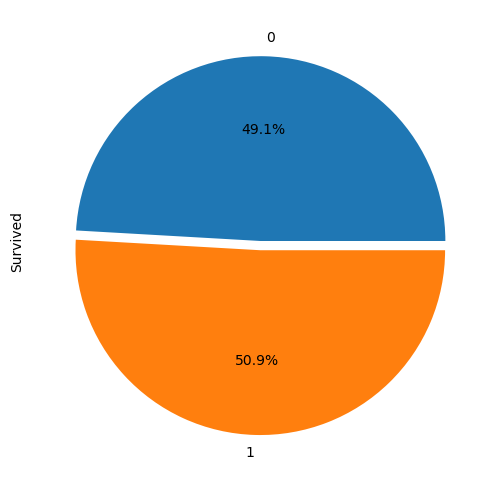

In [40]:
titanic_train[titanic_train['Age_band'] == 'Children'].Survived.groupby(titanic_train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
plt.set_title("Child survival rate")
#plt.show()

------------------------------------------**CHILD-SURVIVAL RATE**--------------------------------------------------------------

Text(0.5, 1.0, 'Infant survival rate')

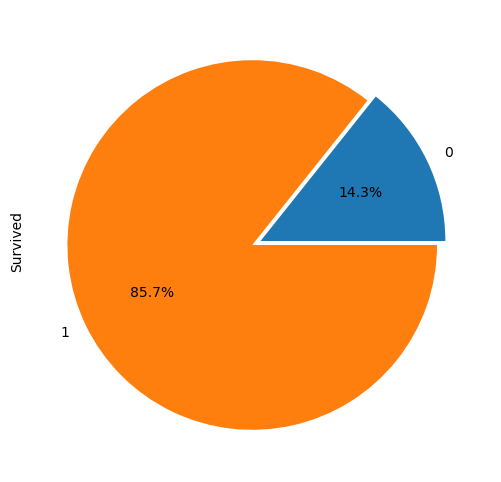

In [41]:
titanic_train[titanic_train['Age_band'] == 'Infant'].Survived.groupby(titanic_train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
plt.set_title("Infant survival rate")
#plt.show()

------------------------------------------**INFANT-SURVIVAL RATE**--------------------------------------------------------------

### Insights

- Majority Passengers were Adults

- Almost half of the total number of children survived.

- Most of the Adults failed to Survive

- More than 85percent of Infant Survived

### 4.4 Did Economy Class had an impact on survival rate?

In [42]:
titanic_train.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

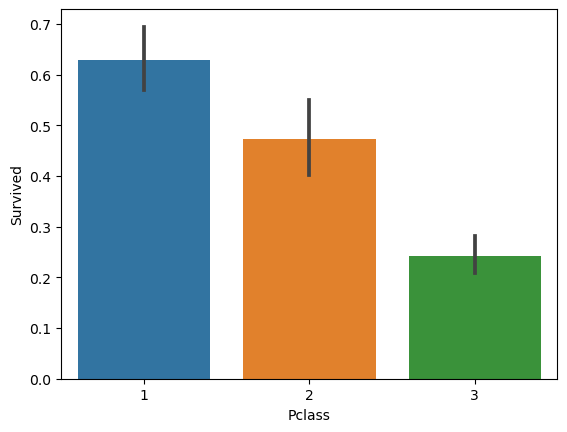

In [44]:
sns.barplot(x= 'Pclass',y ='Survived', data = titanic_train)

<Axes: xlabel='Pclass', ylabel='Survived'>

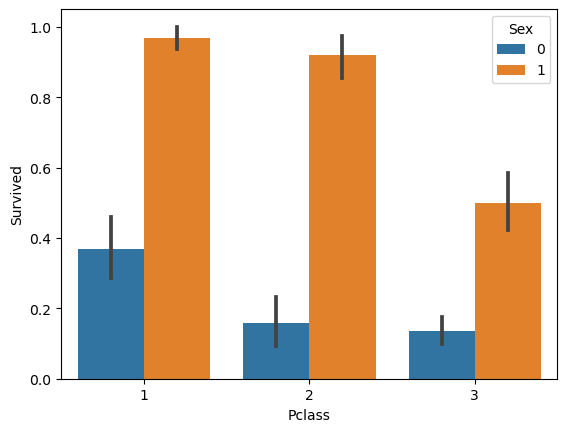

In [46]:
sns.barplot(x = 'Pclass',y = 'Survived',hue='Sex', data=titanic_train)

### Insights

- Most of the passengers travelled in Third class but only 24per of them survived

- If we talk about survival ,more passengers in First class survived and again female given more priority

- Economic Class affected Survival rate and Passengers travelling with First Class had higher ratio of survival as compared to Class 2 and 3.

### 4.5 **What is Survival Propability based on Embarkment of passengers?**


Titanic’s first voyage was to New York before sailing to the Atlantic Ocean it picked passengers from three ports Cherbourg(C), Queenstown(Q), Southampton(S). Most of the Passengers in Titanicic embarked from the port of Southampton.Lets see how embarkemt affected survival probability.

<Axes: xlabel='Embarked', ylabel='count'>

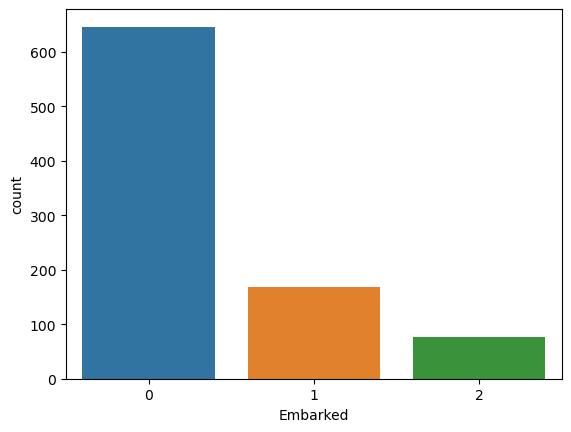

In [48]:
sns.countplot(x = 'Embarked',data=titanic_train)

Text(0, 0.5, 'Survival Probability')

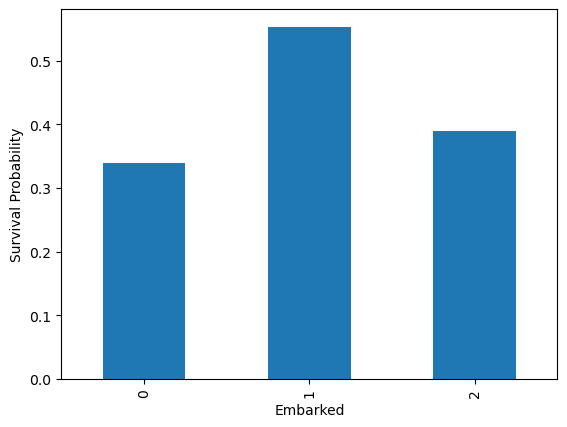

In [50]:
plt = titanic_train[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind = 'bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

### Gender Survival based on Embarkment and Pclass

In [51]:
pd.crosstab([titanic_train.Sex, titanic_train.Survived,titanic_train.Pclass],[titanic_train.Embarked], margins=True)

Embarked               0    1   2  All
Sex Survived Pclass                   
0   0        1        51   25   1   77
             2        82    8   1   91
             3       231   33  36  300
    1        1        28   17   0   45
             2        15    2   0   17
             3        34   10   3   47
1   0        1         2    1   0    3
             2         6    0   0    6
             3        55    8   9   72
    1        1        48   42   1   91
             2        61    7   2   70
             3        33   15  24   72
All                  646  168  77  891

<Axes: xlabel='Embarked', ylabel='Pclass'>

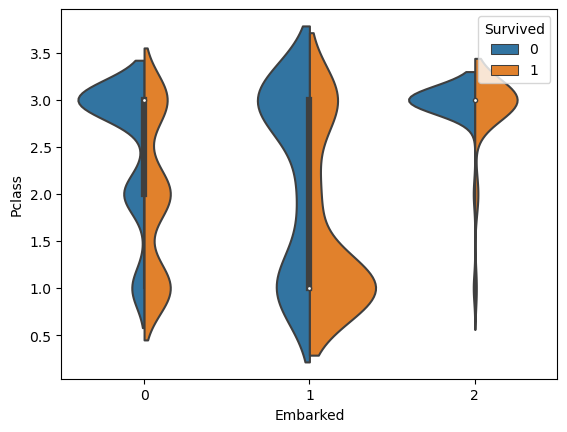

In [52]:
sns.violinplot(x='Embarked',y='Pclass',hue='Survived',data=titanic_train,split=True)

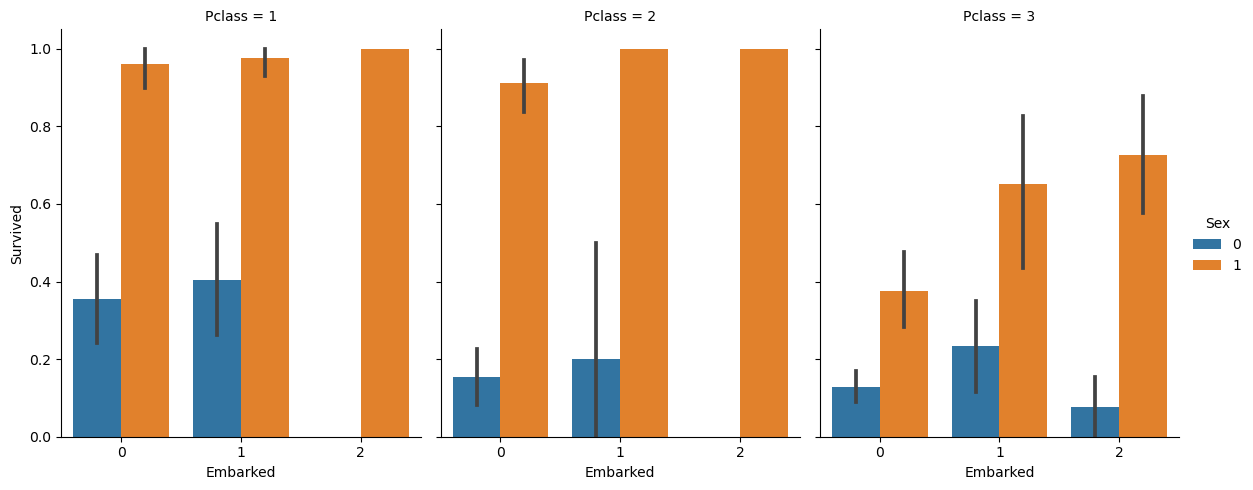

In [53]:
sns.catplot(x="Embarked", y="Survived", hue="Sex",
            col="Pclass", aspect=.8,kind='bar',
             data=titanic_train);

### Insights:

- Most Passengers from port C Survived.

- Most Passengers were from Southampton(S).

- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.

- Males had better survival rate in Port C when compared for S and Q ports.

- Females had least Survival rate in Pclass 3

### 4.6 How is Fare distributed for Passesngers?



In [54]:
titanic_train['Fare'].min()

0.0

In [55]:
titanic_train['Fare'].max()

512.3292

In [56]:
titanic_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0         1  0.199405
1         2  0.385246
2         3  0.446809
3         4  0.621212

In [57]:
titanic_train.groupby(['FareBand', 'Survived'])['Survived'].count()

FareBand  Survived
1         0           269
          1            67
2         0            75
          1            47
3         0           130
          1           105
4         0            75
          1           123
Name: Survived, dtype: int64

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Survived', ylabel='Fare'>

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


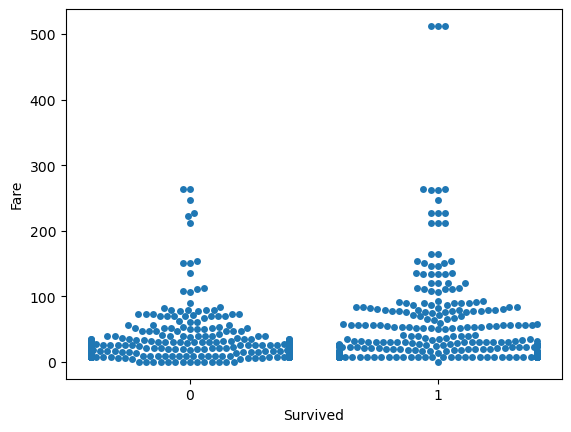

In [61]:
sns.swarmplot(x='Survived', y='Fare', data=titanic_train)

### Insights

- Majority Passenger's fare lies in 0-100 dollars range
- Passengers who paid more Fares had more chances of Survival
- Fare as high as 514 dollars was purcharsed by very few.(Outlier)

### 4.7 What was Average fare by Pclass & Embark location?

<Axes: xlabel='Pclass', ylabel='Fare'>

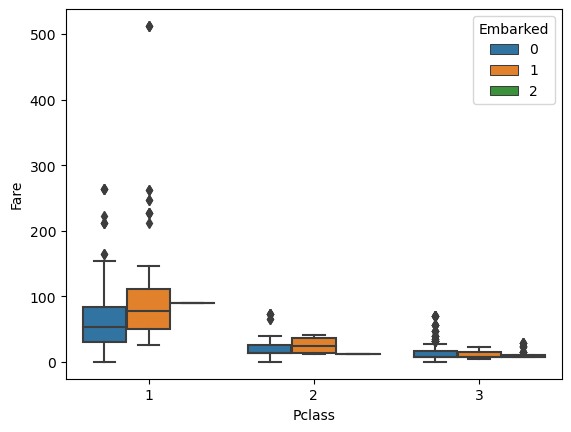

In [65]:
sns.boxplot(x="Pclass", y="Fare", data=titanic_train,hue="Embarked",fliersize=5)

<Axes: xlabel='Embarked', ylabel='Fare'>

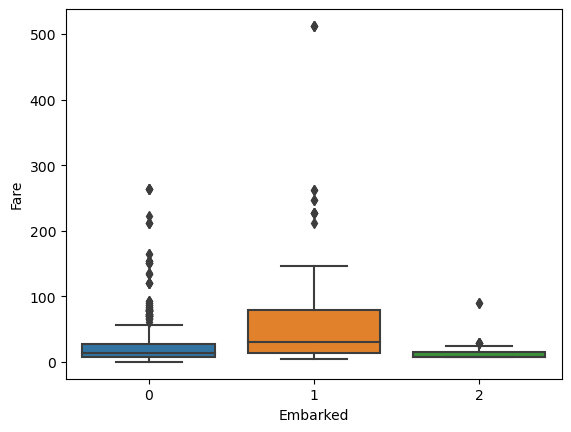

In [66]:
sns.boxplot(x="Embarked", y="Fare", data=titanic_train)

### Insights

- First Class Passengers paid major part of total Fare.
- Passengers who Embarked from Port C paid Highest Fare

### 4.8 Segment Age in bins with size of 10

Text(0.5, 1.08, 'Age Distribution of Titanic Passengers')

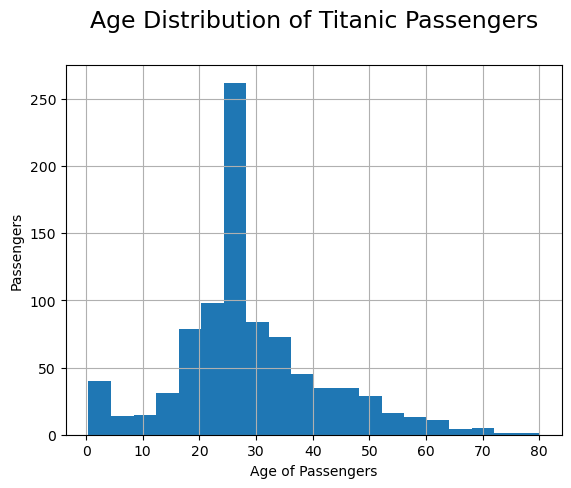

In [67]:
plt=titanic_train['Age'].hist(bins=20)
plt.set_ylabel('Passengers')
plt.set_xlabel('Age of Passengers')
plt.set_title('Age Distribution of Titanic Passengers',size=17, y=1.08)

### Insights:

- The youngest passenger on the Titanic were toddlers under 6 months
- The oldest were of 80 years of age.
- The mean for passengers was a bit over 29 years i.e there were more young passengers in the ship.

### Lets see how Age has correlation with Survival

C:\Users\hp\AppData\Local\Temp\ipykernel_19972\1962919179.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_train[titanic_train['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

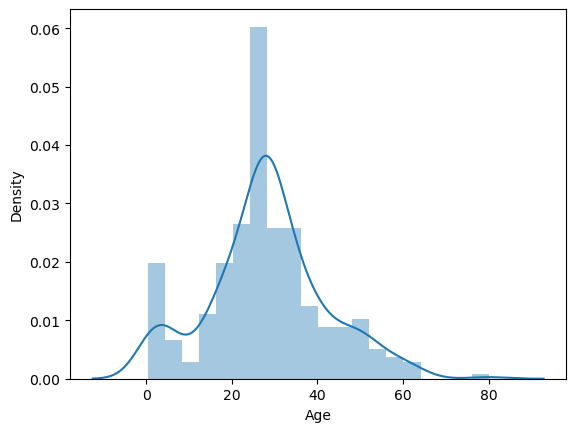

In [70]:
sns.distplot(titanic_train[titanic_train['Survived']==1]['Age'])

C:\Users\hp\AppData\Local\Temp\ipykernel_19972\3768931231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_train[titanic_train['Survived']==0]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

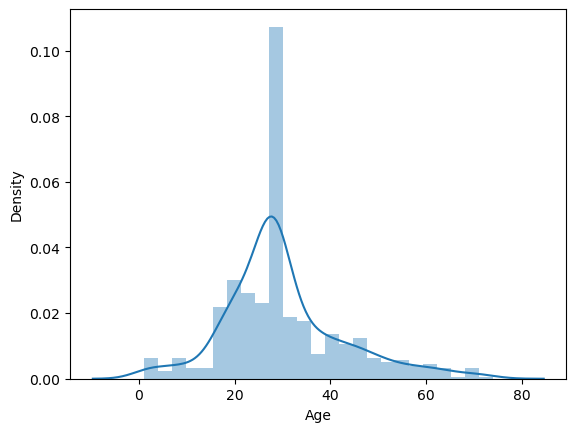

In [71]:
sns.distplot(titanic_train[titanic_train['Survived']==0]['Age'])

<Axes: xlabel='Sex', ylabel='Age'>

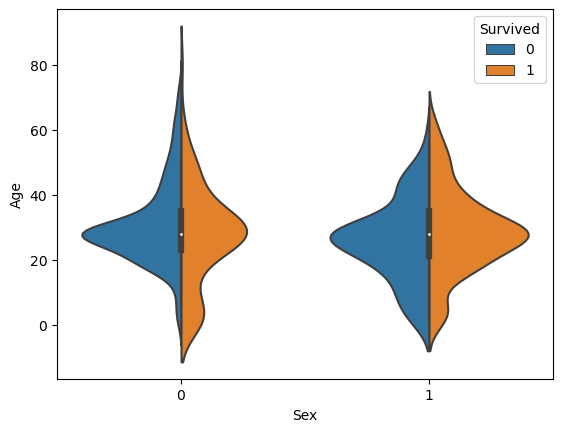

In [72]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=titanic_train,split=True)

### Insights

- Most of the passengers died.
- Majority of passengers were between 25-40,most of them died
- Female are more likely to survival

### 4.9 Did Solo Passenger has less chances of Survival ?

In [73]:
titanic_train['FamilySize']=0
titanic_train['FamilySize']=titanic_train['Parch']+titanic_train['SibSp']
titanic_train['SoloPassenger']=0
titanic_train.loc[titanic_train.FamilySize==0,'SoloPassenger']=1

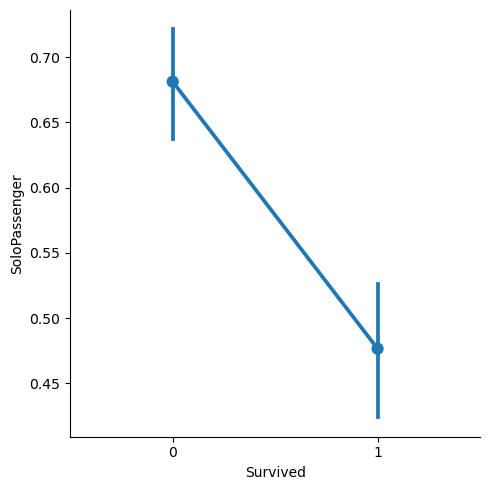

In [79]:
sns.catplot(y= 'SoloPassenger',x = 'Survived',data=titanic_train,kind = 'point')

<Axes: xlabel='Sex', ylabel='SoloPassenger'>

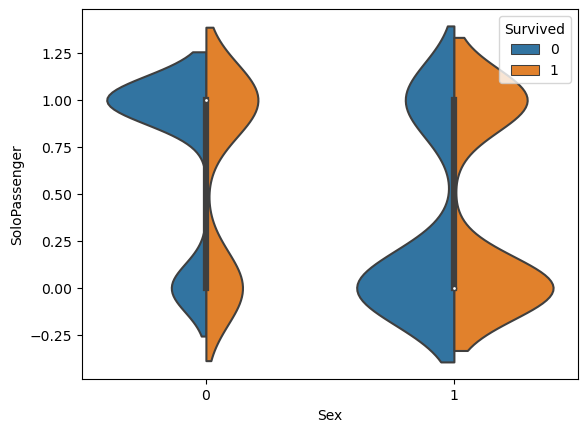

In [80]:
sns.violinplot(y='SoloPassenger',x='Sex',hue='Survived',data=titanic_train,split=True)

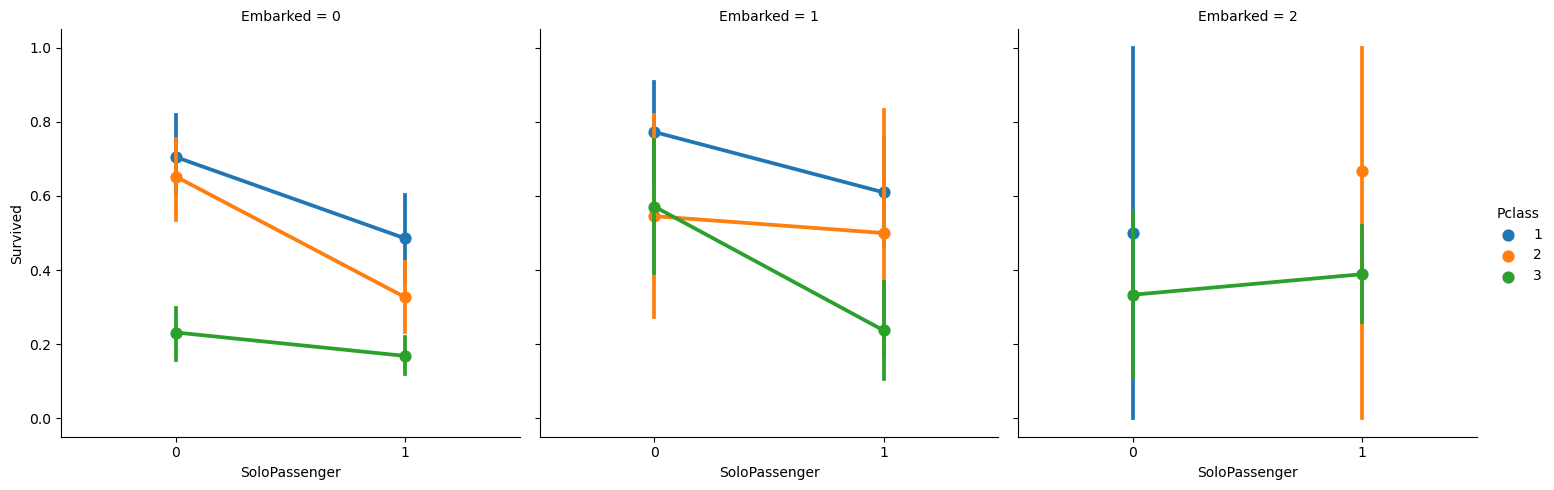

In [82]:
sns.catplot(x ='SoloPassenger',y = 'Survived',hue='Pclass',col="Embarked",data=titanic_train,kind = 'point')

### Insights

- Most of the Passengers were travelling Solo and most of them died
- Solo Females were more likely to Survive as compared to males
- Passengers Class have a positive correlation with Solo Passenger Survival
- Passengers Embarked from Port Q had Fifty -Fifty Chances of Survival

### 4.10 How did total family size affected Survival Count?

In [83]:
for i in titanic_train:
    titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1

titanic_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

<Axes: xlabel='FamilySize', ylabel='Survived'>

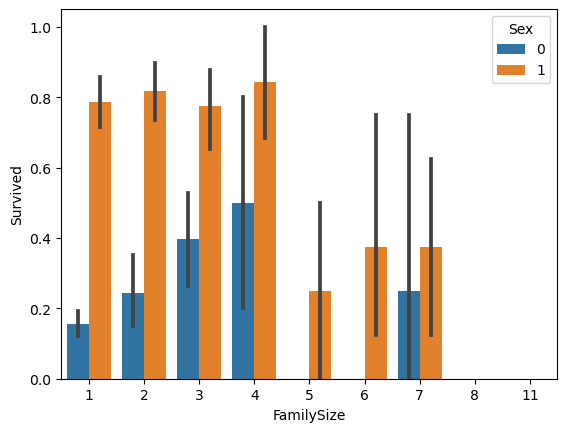

In [84]:
sns.barplot(x='FamilySize', y='Survived', hue='Sex', data=titanic_train)

### Insights

- Both men and women had a massive drop of survival with a FamilySize over 4.
- The chance to survive as a man increased with FamilySize until a size of 4
- Men are not likely to Survive with FamilySize 5 and 6
- Big Size Family less likihood of Survival

### 4.11 How can you correlate Pclass/Age/Fare with Survival rate?

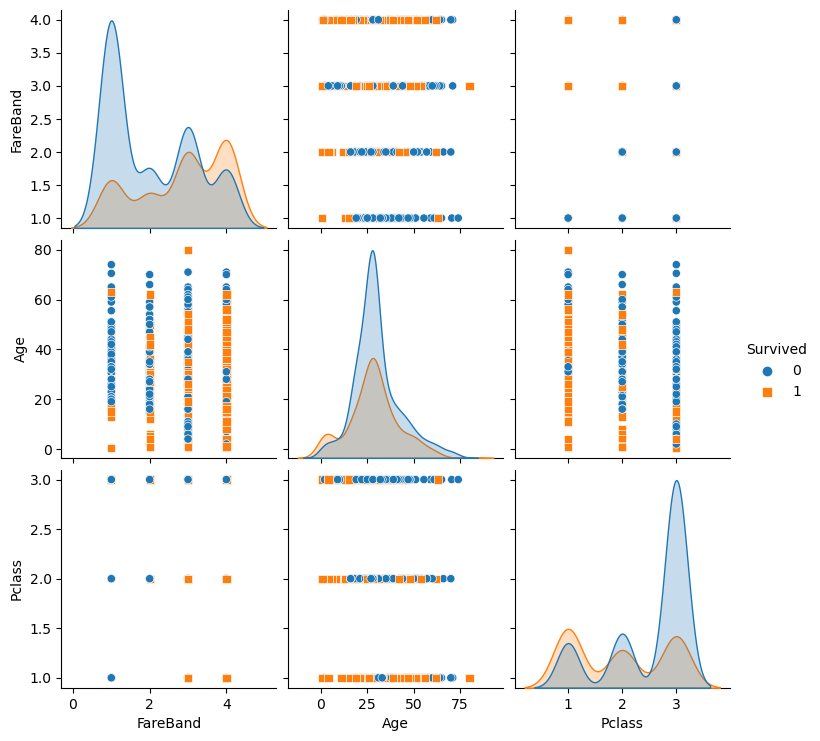

In [85]:
sns.pairplot(titanic_train[["FareBand","Age","Pclass","Survived"]],vars= ["FareBand","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])

### Insights:
- Fare and Survival has positive correlation

- We cannt relate age and Survival as majority of travellers were of mid age

- Higher Class Passengers had more likeihood of Survival

### 4.12 Which features had most impact on Survival rate?

C:\Users\hp\AppData\Local\Temp\ipykernel_19972\26408668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_train.corr(),annot=True)


<Axes: >

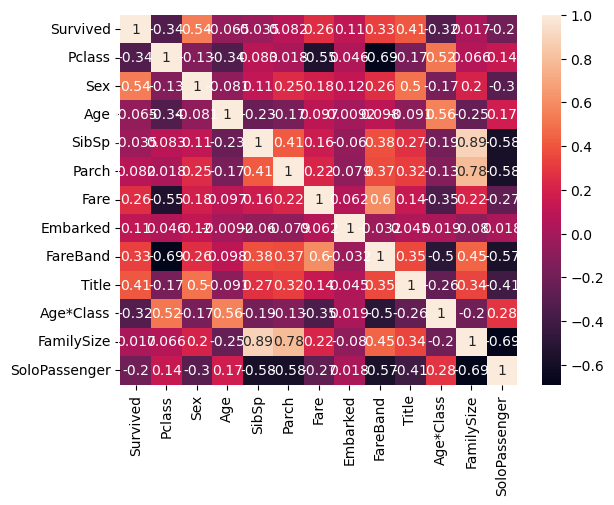

In [86]:
sns.heatmap(titanic_train.corr(),annot=True)

### Insights:

- Older women have higher rate of survival than older men . Also, older women has higher rate of survival than younger women; an opposite trend to the one for the male passengers.
- All the features are not necessary to predict Survival
- More Features creates Complexitity
- Fare has positive Correlation
- For Females major Survival Chances , only for port C males had more likeihood of Survival.

# Conclusion : "If you were young female travelling in First Class and embarked from port -C then you have best chances of Survival in Titanic"

-  Most of the Passengers Died
- "Ladies & Children First" i.e **76% of Females and 16% of Children** Survived
-  Gender , Passenger type & Classs are mostly realted to Survival.
-  Survival rate diminishes significantly for Solo  Passengers
-  Majority of Male Died
-  Males with Family had better Survival rate as compared to Solo Males